In [12]:
import numpy as np
from numpy import pi, cos, sin, linspace, meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [13]:
%matplotlib notebook

In [47]:
def x_(u, v):
    x = -2 + 2*cos(v) - cos(u)
    x[v<3*pi] = -2 + (2 + cos(u[v<3*pi]))*cos(v[v<3*pi])
    x[v<2*pi] = cos(u[v<2*pi])*(2.5 - 1.5*cos(v[v<2*pi]))
    return x

def y_(u, v):
    y = sin(u)
    y[v<2*pi] = sin(u[v<2*pi])*(2.5 - 1.5*cos(v[v<2*pi]))
    return y

def z_(u, v):
    z = -3*v + 12*pi
    z[v<3*pi] = (2 + cos(u[v<3*pi]))*sin(v[v<3*pi]) + 3*pi
    z[v<2*pi] = 3*v[v<2*pi] - 3*pi
    z[v<pi] = -2.5*sin(v[v<pi])
    return -z

 
u = linspace(pi, 2*pi, 10)
v = linspace(0, 4*pi, 38)
u, v = meshgrid(u, v)

x = x_(u, v)
y = y_(u, v)
z = z_(u, v)

In [54]:
def set_aspect_equal_3d(ax):
    """Fix equal aspect bug for 3D plots
    
    Solution taken from:

        https://stackoverflow.com/a/35126679/3358223
    """

    xlim = ax.get_xlim3d()
    ylim = ax.get_ylim3d()
    zlim = ax.get_zlim3d()

    xmean = np.mean(xlim)
    ymean = np.mean(ylim)
    zmean = np.mean(zlim)

    plot_radius = max([abs(lim - mean_)
                       for lims, mean_ in ((xlim, xmean),
                                           (ylim, ymean),
                                           (zlim, zmean))
                       for lim in lims])

    ax.set_xlim3d([xmean - plot_radius, xmean + plot_radius])
    ax.set_ylim3d([ymean - plot_radius, ymean + plot_radius])
    ax.set_zlim3d([zmean - plot_radius, zmean + plot_radius])
    return None

<IPython.core.display.Javascript object>


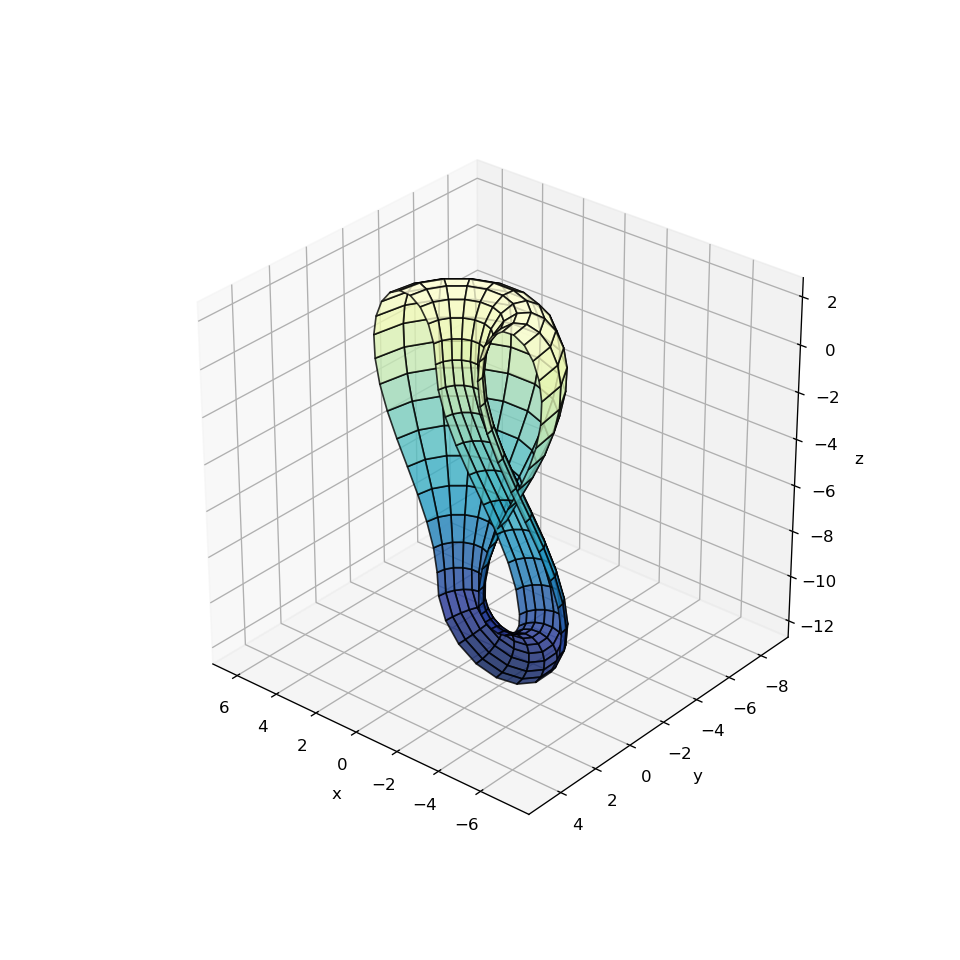

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="YlGnBu_r", alpha=0.8, lw=1,
               edgecolor="black")
ax.view_init(azim=130, elev=30)
set_aspect_equal_3d(ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()